### 1005 복습

#### 1

In [1]:
import pydataset

In [2]:
computers = pydataset.data("Computers")
computers

,price,speed,hd,ram,screen,cd,multi,premium,ads,trend
1,1499,25,80,4,14,no,no,yes,94,1
2,1795,33,85,2,14,no,no,yes,94,1
3,1595,25,170,4,15,no,no,yes,94,1
4,1849,25,170,8,14,no,no,no,94,1
5,3295,33,340,16,14,no,no,yes,94,1
...,...,...,...,...,...,...,...,...,...,...
6255,1690,100,528,8,15,no,no,yes,39,35
6256,2223,66,850,16,15,yes,yes,yes,39,35
6257,2654,100,1200,24,15,yes,no,yes,39,35
6258,2195,100,850,16,15,yes,no,yes,39,35


In [6]:
#pivot table 을 사용하여 'screen'과 'ram'에 따른 'price'의 최대값, 최소값, 평균값
computers.pivot_table(index = 'ram', columns = 'screen',
                      values = 'price', aggfunc = ['max', 'min', 'mean'])

max                     min                         mean  \
screen      14      15      17      14      15      17           14   
ram                                                                   
2       2294.0  2090.0  1568.0   949.0  1088.0  1418.0  1712.566978   
4       3814.0  3914.0  3778.0  1099.0  1199.0  1518.0  1817.672561   
8       4395.0  4104.0  4999.0  1195.0  1299.0  1765.0  2236.170008   
16      4694.0  3849.0  4799.0  1799.0  1823.0  2390.0  2848.310433   
24      3644.0  3790.0  3440.0  2795.0  2223.0  2340.0  3155.200000   
32         NaN  3994.0  5399.0     NaN  2995.0  3290.0          NaN   

                                  
screen           15           17  
ram                               
2       1668.485714  1518.000000  
4       1952.274648  2208.976471  
8       2289.883100  2591.178322  
16      2650.046939  3129.663717  
24      2871.274038  2946.896552  
32      3183.272727  4555.400000

#### 2

In [7]:
from datetime import datetime

In [11]:
import pandas as pd

In [14]:
import numpy as np

In [17]:
#2000년 1월 1일 부터 현재까지 일(d) 단위로
dt = pd.date_range(start = '1/1/2000', end = datetime.now(), freq = 'd')

np.random.seed(1234)
s = pd.Series(index = dt, data = np.random.randn(8315))
s

2000-01-01    0.471435
2000-01-02   -1.190976
2000-01-03    1.432707
2000-01-04   -0.312652
2000-01-05   -0.720589
                ...   
2022-10-02   -1.180929
2022-10-03   -0.809345
2022-10-04    0.039162
2022-10-05    0.161437
2022-10-06   -0.551424
Freq: D, Length: 8315, dtype: float64

In [27]:
#2001년 1월 1일 부터 2010년 12월 31일까지 각 열의 합 더하기
s['2001/01' : '2010/12'].sum()

52.86295905598889

#### 3

In [28]:
df = pd.DataFrame({0 : ['아', '야', '어', '여'],
                   1 : ['안녕$하세요', '반a갑a습니다', '오5랜만10000입니다', '다음에:뵈요']})
df

,0,1
0,아,안녕$하세요
1,야,반a갑a습니다
2,어,오5랜만10000입니다
3,여,다음에:뵈요


In [29]:
df.iloc[: , 1]

0          안녕$하세요
1         반a갑a습니다
2    오5랜만10000입니다
3          다음에:뵈요
Name: 1, dtype: object

In [30]:
df[1]

0          안녕$하세요
1         반a갑a습니다
2    오5랜만10000입니다
3          다음에:뵈요
Name: 1, dtype: object

In [34]:
#한글만 보이게
df.iloc[: , 1].str.replace("[^가-힣]", "")

C:\Users\admin\AppData\Local\Temp\ipykernel_7164\1012347829.py:2: FutureWarning: The default value of regex will change from True to False in a future version.
  df.iloc[: , 1].str.replace("[^가-힣]", "")


0     안녕하세요
1     반갑습니다
2    오랜만입니다
3     다음에뵈요
Name: 1, dtype: object

In [40]:
#pandas 객체에 딕셔너리를 적용시커 데이터에 매핑시키려면 -> map
df

,0,1
0,아,안녕$하세요
1,야,반a갑a습니다
2,어,오5랜만10000입니다
3,여,다음에:뵈요


In [41]:
d = {"아" : "a", "야" : "b", "어" : "c", "여" : "d"}

In [42]:
df.iloc[:, 0].map(d)

0    a
1    b
2    c
3    d
Name: 0, dtype: object

#### 4

In [43]:
#mpg 데이터에서 제조사와 모델별 cty와 hwy의 최소, 최대값과 displ의 평균 -> pivot_table을 이용해
mpg = pydataset.data('mpg')
mpg.head()

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class
1,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact
2,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact
3,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact
4,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact
5,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact


In [46]:
mpg.pivot_table(values = ['cty', 'hwy', 'displ'],
                index = ['manufacturer', 'model'],
               aggfunc = {'cty' : ['min', 'max'], 'hwy' : ['min', 'max'], 'displ' : 'mean'})

cty         displ hwy    
                                    max min      mean max min
manufacturer model                                           
audi         a4                      21  16  2.328571  31  26
             a4 quattro              20  15  2.425000  28  25
             a6 quattro              17  15  3.366667  25  23
chevrolet    c1500 suburban 2wd      14  11  5.520000  20  15
             corvette                16  15  6.160000  26  23
             k1500 tahoe 4wd         14  11  5.700000  19  14
             malibu                  22  17  3.000000  30  26
dodge        caravan 2wd             18  11  3.390909  24  17
             dakota pickup 4wd       15   9  4.411111  19  12
             durango 4wd             13   9  4.971429  18  12
             ram 1500 pickup 4wd     13   9  5.020000  17  12
ford         expedition 2wd          12  11  5.133333  18  17
             explorer 4wd            15  13  4.266667  19  17
             f150 pickup 4wd         14  11  4.714286  17  15
             mustang                 18  14  4.377778  26  20
honda        civic                   28  21  1.711111  36  29
hyundai      sonata                  21  18  2.557143  31  26
             tiburon                 20  16  2.300000  29  24
jeep         grand cherokee 4wd      17   9  4.575000  22  12
land rover   range rover             12  11  4.300000  18  15
lincoln      navigator 2wd           12  11  5.400000  18  16
mercury      mountaineer 4wd         14  13  4.400000  19  17
nissan       altima                  23  19  2.800000  32  26
             maxima                  19  18  3.166667  26  25
             pathfinder 4wd          15  12  4.050000  20  17
pontiac      grand prix              18  16  3.960000  28  25
subaru       forester awd            20  18  2.500000  27  23
             impreza awd             21  19  2.425000  27  25
toyota       4runner 4wd             16  14  3.483333  20  17
             camry                   21  18  2.671429  31  26
             camry solara            22  18  2.642857  31  26
             corolla                 28  24  1.800000  37  30
             land cruiser wagon 4wd  13  11  5.200000  18  15
             toyota tacoma 4wd       17  15  3.271429  22  17
volkswagen   gti                     22  17  2.160000  29  24
             jetta                   33  16  2.277778  44  23
             new beetle              35  19  2.133333  44  26
             passat                  21  16  2.400000  29  26

### 1006

#### 신생아 이름

In [49]:
names1880 = pd.read_csv('https://raw.githubusercontent.com/wesm/pydata-book/3rd-edition/datasets/babynames/yob1880.txt',
                        names=['name', 'sex', 'births'])
names1880

,name,sex,births
0,Mary,F,7065
1,Anna,F,2604
2,Emma,F,2003
3,Elizabeth,F,1939
4,Minnie,F,1746
...,...,...,...
1995,Woodie,M,5
1996,Worthy,M,5
1997,Wright,M,5
1998,York,M,5


In [53]:
names1880['births'].sum()
names1880.groupby('sex')[['births']].sum()

,births
sex,
F,90993
M,110493


In [54]:
import os
os.getcwd()

'C:\\Users\\admin'

In [56]:
pd.read_csv("yob1880.txt")

,Mary,F,7065
0,Anna,F,2604
1,Emma,F,2003
2,Elizabeth,F,1939
3,Minnie,F,1746
4,Margaret,F,1578
...,...,...,...
1994,Woodie,M,5
1995,Worthy,M,5
1996,Wright,M,5
1997,York,M,5


In [59]:
#years = range(1880, 2011)
#df = []
columns = ['name', 'gender', 'births']
years = range(1880, 1881)
for year in years :
    frame = pd.read_csv(f"yob{year}.txt", names = columns)
    #frame = pd.read_csv("yob{}.txt".fomat(year))
    #frame = pd.read_csv("yob%d.txt".%year)
    frame['year'] = year
    
frame    

,name,gender,births,yaer
0,Mary,F,7065,1880
1,Anna,F,2604,1880
2,Emma,F,2003,1880
3,Elizabeth,F,1939,1880
4,Minnie,F,1746,1880
...,...,...,...,...
1995,Woodie,M,5,1880
1996,Worthy,M,5,1880
1997,Wright,M,5,1880
1998,York,M,5,1880


In [61]:
#years = range(1880, 2011)
#df = []
columns = ['name', 'gender', 'births']
years = range(1880, 1882)
df = pd.DataFrame()

for year in years :
    frame = pd.read_csv(f"yob{year}.txt", names = columns)
    #frame = pd.read_csv("yob{}.txt".fomat(year))
    #frame = pd.read_csv("yob%d.txt".%year)
    frame['year'] = year
    df = pd.concat([df, frame])    
    
df

,name,gender,births,yaer
0,Mary,F,7065,1880
1,Anna,F,2604,1880
2,Emma,F,2003,1880
3,Elizabeth,F,1939,1880
4,Minnie,F,1746,1880
...,...,...,...,...
1930,Wiliam,M,5,1881
1931,Wilton,M,5,1881
1932,Wing,M,5,1881
1933,Wood,M,5,1881


In [68]:
years = range(1880, 2011)
columns = ['name', 'gender', 'births']
#years = range(1880, 1882)
df = pd.DataFrame()

for year in years :
    frame = pd.read_csv(f"yob{year}.txt", names = columns)
    #frame = pd.read_csv("yob{}.txt".fomat(year))
    #frame = pd.read_csv("yob%d.txt".%year)
    frame['year'] = year
    df = pd.concat([df, frame], ignore_index = True)    
    
df

,name,gender,births,year
0,Mary,F,7065,1880
1,Anna,F,2604,1880
2,Emma,F,2003,1880
3,Elizabeth,F,1939,1880
4,Minnie,F,1746,1880
...,...,...,...,...
1690779,Zymaire,M,5,2010
1690780,Zyonne,M,5,2010
1690781,Zyquarius,M,5,2010
1690782,Zyran,M,5,2010


In [69]:
names = df.set_index('name').reset_index()
names[:4]

,name,gender,births,year
0,Mary,F,7065,1880
1,Anna,F,2604,1880
2,Emma,F,2003,1880
3,Elizabeth,F,1939,1880


In [70]:
total_births = names.pivot_table('births', index = 'year', columns = 'gender', aggfunc = sum)
total_births[:3]

gender,F,M
year,,
1880,90993,110493
1881,91955,100748
1882,107851,113687


<AxesSubplot:xlabel='year'>

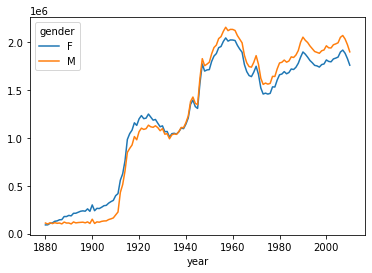

In [71]:
total_births.plot(kind = 'line')

In [74]:
t1 = total_births.reset_index().melt(id_vars = 'year', value_vars = ['F', 'M'])
t1

,year,gender,value
0,1880,F,90993
1,1881,F,91955
2,1882,F,107851
3,1883,F,112322
4,1884,F,129021
...,...,...,...
257,2006,M,2050234
258,2007,M,2069242
259,2008,M,2032310
260,2009,M,1973359


In [72]:
import seaborn as sns

<AxesSubplot:xlabel='year', ylabel='value'>

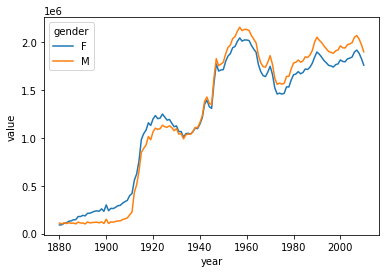

In [76]:
sns.lineplot(data = t1, x = 'year', y = 'value', hue = 'gender')